<a href="https://colab.research.google.com/github/christine127/DeepLearning/blob/main/housing_price_kaggle(ML%2BDL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate


# 1. Defining the problem statement
Look at each variable and do a philosophical analysis about their meaning and importance for this problem.

# 2. Collecting Data

In [ ]:
dataset = pd.read_csv("/content/house_price/train.csv")
df =dataset.copy()
test = pd.read_csv('/content/house_price/test.csv')
sub_df = pd.read_csv('/content/house_price/sample_submission.csv')

In [ ]:
train_test = pd.concat([df,test])

In [ ]:
# X_df = dataset.iloc[:, :-1]
# y_df = dataset.iloc[:,-1]

# X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle = True,random_state=121)
# print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


# 3. EDA(Exploratory Data Analysis) & Data Preprocessing


In [ ]:
dataset.shape

(1460, 81)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing_Value 

In [ ]:
nan_dict = {"CNT":train_test.isna().sum(),
            "RATE": train_test.isna().sum()/train_test.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

               CNT       RATE
PoolQC        2909  99.657417
MiscFeature   2814  96.402878
Alley         2721  93.216855
Fence         2348  80.438506
SalePrice     1459  49.982871
FireplaceQu   1420  48.646797
LotFrontage    486  16.649538
GarageCond     159   5.447071
GarageYrBlt    159   5.447071
GarageFinish   159   5.447071
GarageQual     159   5.447071
GarageType     157   5.378554
BsmtExposure    82   2.809181
BsmtCond        82   2.809181
BsmtQual        81   2.774923
BsmtFinType2    80   2.740665
BsmtFinType1    79   2.706406
MasVnrType      24   0.822199
MasVnrArea      23   0.787941
MSZoning         4   0.137033
Functional       2   0.068517
BsmtHalfBath     2   0.068517
BsmtFullBath     2   0.068517
Utilities        2   0.068517
KitchenQual      1   0.034258
TotalBsmtSF      1   0.034258
BsmtUnfSF        1   0.034258
GarageCars       1   0.034258
GarageArea       1   0.034258
BsmtFinSF2       1   0.034258
BsmtFinSF1       1   0.034258
Exterior2nd      1   0.034258
Exterior1s

(35, 2)

### category variables which use NA as a type  
<pre>
Alley
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmyFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
</pre>



In [ ]:
Not_NA=['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType',
'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
len(Not_NA)

14

#### Converting types: category varilables (obj --> numeric)

In [ ]:
for i in Not_NA:
    print(i,train_test[i].unique())

Alley [nan 'Grvl' 'Pave']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [ ]:
change_dict = [{'Grvl':1,'Pave':2}, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},{'No':1 ,'Gd':2, 'Mn':3, 'Av':4},
{'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'LwQ':6},
{'Unf':1, 'BLQ':2,'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6},
{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
{'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4,'Basment':5,'2Types':6},
{'RFn':1, 'Unf':2, 'Fin':3},
{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
{'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},{'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4},
{'Shed':1,'Gar2':2, 'Othr':3, 'TenC':4}]



In [ ]:
for i in range(len(Not_NA)):
    train_test["T_"+Not_NA[i]] = train_test[Not_NA[i]].map(change_dict[i])
    train_test["T_"+Not_NA[i]].fillna(0, inplace= True)

In [ ]:
for i in range(len(Not_NA)):
    print(train_test[train_test["T_"+Not_NA[i]]==0].shape[0]) # 0의 개수
    print(train_test[Not_NA[i]].isna().sum()) #원래 NA 개수
    print("-"*30)

2721
2721
------------------------------
81
81
------------------------------
82
82
------------------------------
82
82
------------------------------
79
79
------------------------------
80
80
------------------------------
1420
1420
------------------------------
157
157
------------------------------
159
159
------------------------------
159
159
------------------------------
159
159
------------------------------
2909
2909
------------------------------
2348
2348
------------------------------
2814
2814
------------------------------


In [ ]:
train_test.drop(Not_NA, axis=1, inplace= True)

In [ ]:
train_test.shape

(2919, 81)

In [ ]:
#남은 결측치 확인
nan_dict = {"CNT":train_test.isna().sum(),
            "RATE": train_test.isna().sum()/train_test.shape[0] *100
}
nan_df = pd.DataFrame(nan_dict)
print(nan_df[nan_df["RATE"]>0].sort_values("CNT", ascending=False))

nan_df[nan_df["RATE"]>0].shape

# LotFrontage: Linear feet of street connected to property float
# GarageYrBlt: Year garage was built
# MasVnrType: Masonry veneer type 건물 외벽 object
# MasVnrArea: Masonry veneer area in square feet float
# Electrical: Electrical system object

               CNT       RATE
SalePrice     1459  49.982871
LotFrontage    486  16.649538
GarageYrBlt    159   5.447071
MasVnrType      24   0.822199
MasVnrArea      23   0.787941
MSZoning         4   0.137033
BsmtFullBath     2   0.068517
BsmtHalfBath     2   0.068517
Functional       2   0.068517
Utilities        2   0.068517
Exterior2nd      1   0.034258
BsmtFinSF1       1   0.034258
BsmtFinSF2       1   0.034258
BsmtUnfSF        1   0.034258
Exterior1st      1   0.034258
Electrical       1   0.034258
KitchenQual      1   0.034258
GarageCars       1   0.034258
GarageArea       1   0.034258
SaleType         1   0.034258
TotalBsmtSF      1   0.034258


(21, 2)

In [ ]:
real_NA = list(nan_df[nan_df["RATE"]>0].index)

train_test['LotFrontage'] = train_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

real_NA.remove('LotFrontage')

for i in real_NA:
    train_test[i].fillna(train_test[i].mode()[0], inplace= True)

## Numeric

In [ ]:
object_col= train_test.dtypes[train_test.dtypes == object].index

In [ ]:
object_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# ##get dummies 인코딩
# df_copy = df.copy()
# for i in range(len(object_col)):
#     dummy_df = pd.get_dummies(df[object_col[i]])
#     df_copy = pd.concat([df_copy,dummy_df], axis =1)
#     # df = df.join(dummy_df)

# # dummy_df = pd.get_dummies(df[object_col[0]])
# # df_copy = pd.concat([df_copy,dummy_df], axis=1)
    

In [ ]:
# Label 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_encoder = LabelEncoder()

for col in object_col:   
    train_test["LE_"+col] = le_encoder.fit_transform(train_test[col])    

In [ ]:
#기존 컬럼 삭제
train_test.drop(object_col, axis = 1, inplace= True)

In [ ]:
#남은 object type 있는지 확인
train_test.dtypes[train_test.dtypes == object].index

Index([], dtype='object')

## Scaling

In [ ]:
y_df = dataset["SalePrice"]

In [ ]:
#log transform skewed numeric features:
from scipy.stats import skew
numeric_feats = train_test.dtypes[train_test.dtypes != "object"].index
skewed_feats =  train_test[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats =skewed_feats.index

train_test[skewed_feats] = np.log1p(train_test[skewed_feats])
#y값 스케일링
y_df  = np.log1p(y_df)

In [ ]:
#Id 제거
train_test.drop("Id", axis=1, inplace= True)

KeyError: ignored

In [ ]:
X_df = train_test.iloc[:1460,:].drop("SalePrice",axis=1)
test_df =train_test.iloc[1460:,:].drop("SalePrice",axis=1)

# 회귀분석

## 우선 점수부터 보자

In [ ]:
X_train , X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.2, shuffle = True,random_state=121)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

model1 = LinearRegression()
model1.fit(X_train,y_train)

pred = model1.predict(X_val)
mse = mean_squared_error(y_val, pred, squared = True) #MSE
rmse = mean_squared_error(y_val, pred, squared = False) #RMSE

print(f'MSE:{mse:.5f} RMSE {rmse:.5f}')

#dummy
#MSE:183766087910688064.00000 RMSE 428679469.89643 처음
#MSE:728536469.52603 RMSE 26991.41474 Id 제거
#MSE:969745875.68496 RMSE 31140.74302 scale 후에
#MSE:908127775.78686 RMSE 30135.15847 scale 후에

#-----------------------------------------------------------
#Label
# MSE:827344230.24246 RMSE 28763.59210 처음
# MSE:954940616.83012 RMSE 30902.11347 스케일 후
# MSE:1593369743.02272 RMSE 39917.03575 pca 후









(1168, 79) (292, 79) (1168,) (292,)
MSE:0.01298 RMSE 0.11395


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
lasso = Lasso(alpha = 1.0)
ridge = Ridge(alpha = 1.0)
elsnet = ElasticNet(alpha = 0.05, l1_ratio =0.1)

#RMSE mean, MSE mean, fold
models = [lasso, ridge, elsnet]
    # models = [LinearRegression()]
for model in models:
    score_list = cross_validate(model, X_df, y_df, 
                                 scoring = {'mse':'neg_mean_squared_error',
                                            'rmse':'neg_root_mean_squared_error'},
                                 cv= 10, return_train_score = False)
    mse_score = -score_list['test_mse']
    rmse_score = -score_list['test_rmse']
    print(f'{model.__class__.__name__} MSE: {mse_score.mean():.4f} RMSE: {rmse_score.mean():.4f}')

Lasso MSE: 0.0719 RMSE: 0.2674
Ridge MSE: 0.0185 RMSE: 0.1335
ElasticNet MSE: 0.0212 RMSE: 0.1441


In [ ]:
cv_model = GridSearchCV(ridge, param_grid = {'alpha':[0.5,1.0]},
            scoring = "neg_root_mean_squared_error",
            cv = 10)
cv_model.fit(X_train, y_train)
print(f'{cv_model.best_score_*-1:.5f}')
print(cv_model.best_params_)

0.14288
{'alpha': 1.0}


In [ ]:
cv_model = GridSearchCV(ridge, param_grid = {'alpha':[1.0,2.0]},
            scoring = "neg_root_mean_squared_error",
            cv = 10)
cv_model.fit(X_train, y_train)
print(f'{cv_model.best_score_*-1:.5f}')
print(cv_model.best_params_)

0.14247
{'alpha': 2.0}


In [ ]:
## test 
test_pred = cv_model.predict(test_df)
pred_for_submit = np.expm1(test_pred)


In [ ]:
pred_for_submit

array([114978.54699112, 153038.48584279, 178207.37324683, ...,
       169254.45618842, 126376.41388782, 236046.20389497])

In [ ]:
sub_df["SalePrice"] = pred_for_submit.reshape(-1,1)
sub_df.shape

(1459, 2)

In [ ]:
sub_df.head()

,Id,SalePrice
0,1461,114978.546991
1,1462,153038.485843
2,1463,178207.373247
3,1464,195864.434218
4,1465,188808.922790


In [ ]:
sub_df.to_csv("/content/house_price/results.csv", index= False)

## 딥러닝

In [ ]:
## library
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

## seed 설정

np.random.seed(121)
tf.random.set_seed(121)

In [ ]:
fpath = "./model/house_price {epoch:03d}{val_loss:.3f}.h5"
checkpnt= ModelCheckpoint(filepath=fpath, monitor='val_loss',verbose=0, save_best_only=True)
estop = EarlyStopping(monitor = 'val_loss', patience=75)


In [ ]:
## 모델 만들기

model = Sequential()
model.add(Dense(128, input_dim = 79, activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(16,  activation = 'relu'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'adam', metrics= ['mse'])

In [ ]:
res = model.fit(X_train,y_train, validation_split =0.1 , epochs= 1000
          , callbacks = [checkpnt,estop]
         )
pred= model.predict(X_val)
print(pred[:5])
print(y_val[:5])

eval = model.evaluate(X_val, y_val)
print(f'loss:{eval[0]}  rmse::{np.sqrt(eval[1])}')

Epoch 1/1000
33/33 [==============================] - 1s 17ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.1029 - val_mse: 0.1029
Epoch 3/1000
33/33 [==============================] - 0s 3ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 4/1000
33/33 [==============================] - 0s 3ms/step - loss: 0.0499 - mse: 0.0499 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 5/1000
33/33 [==============================] - 0s 3ms/step - loss: 0.0427 - mse: 0.0427 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 6/1000
33/33 [==============================] - 0s 3ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1018 - val_mse: 0.1018
Epoch 7/1000
33/33 [==============================] - 0s 4ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 8/1000
33/33 [==============================] - 0s 3ms/step - loss: 0

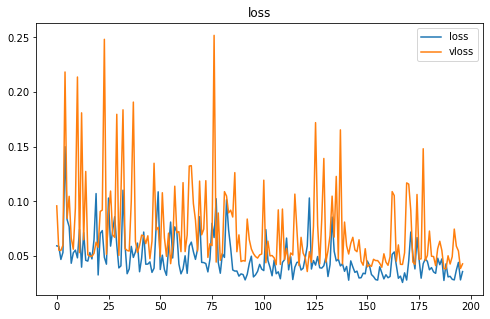

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='vloss')
plt.title("loss")
plt.legend()
plt.show()

In [ ]:
from keras.models import save_model, load_model
model.save("content/model/rmse 0.138.h5")

In [ ]:
import h5py
fpath = "content/model/rmser 0.12.h5"


from keras.models import save_model, load_model
reload_model = load_model(fpath)
pred_re= reload_model.predict(X_val).flatten()

print(pred_re[:5])
print(y_val[:5])

eval = reload_model.evaluate(X_val, y_val)
print(f'loss:{eval[0]}  rmse::{np.sqrt(eval[1])}')

[11.462245 12.519664 11.527161 12.523747 11.650998]
17     11.407576
765    12.484208
179    11.512935
408    12.542548
890    11.719134
Name: SalePrice, dtype: float64
10/10 [==============================] - 0s 1ms/step - loss: 0.0161 - mse: 0.0161
loss:0.016078703105449677  rmse::0.1268018261124408


In [ ]:
# import os
# dir = "/content/model"

# file_list= os.listdir(dir)
# for file in file_list:
#   file_path = dir+"/"+file
#   print(file.split(".")[-2])

#   if (int(file.split(".")[-2]) == 0)  or (int(file.split(".")[-2]) > 30):
#     try:
#       os.remove(file_path)
#     except:
#       continue


In [ ]:
## test 
test_pred = reload_model.predict(test_df)
pred_for_submit = np.expm1(test_pred)
sub_df["SalePrice"] = pred_for_submit.reshape(-1,1)


(1459, 2)

In [ ]:
sub_df.to_csv("/content/house_price/results0.12.csv")